In [25]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [26]:
# Load deviation prediction results:
path_pred_deviations = "../2_conformance_prediction/results/Helpdesk/deviation_predictions.pkl"

# Evaluation deviation labels

In [27]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [28]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.12861018855898246
Precision macro dev per label:  {('>>', 'Assign seriousness'): 0.10526315789473684, ('Create SW anomaly', '>>'): 0.0, ('Require upgrade', '>>'): 0.036458333333333336, ('Resolve ticket', '>>'): 0.10333863275039745, ('Take in charge ticket', '>>'): 0.19571865443425077, ('Wait', '>>'): 0.33088235294117646}
Recall macro dev:  0.5797485670823236
Recall macro dev per label:  {('>>', 'Assign seriousness'): 0.3333333333333333, ('Create SW anomaly', '>>'): 0.0, ('Require upgrade', '>>'): 0.9130434782608695, ('Resolve ticket', '>>'): 0.8783783783783784, ('Take in charge ticket', '>>'): 0.7804878048780488, ('Wait', '>>'): 0.5732484076433121}


In [29]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.9953858032252697
Precision macro per label no dev:  {('>>', 'Assign seriousness'): 0.9984158415841584, ('Create SW anomaly', '>>'): 0.9988004798080767, ('Require upgrade', '>>'): 0.9994918699186992, ('Resolve ticket', '>>'): 1.0, ('Take in charge ticket', '>>'): 0.9923319801533604, ('Wait', '>>'): 0.983274647887324}
Recall macro no dev:  0.8911155551819442
Recall macro per label no dev:  {('>>', 'Assign seriousness'): 0.9933018124507487, ('Create SW anomaly', '>>'): 0.983077528532074, ('Require upgrade', '>>'): 0.7799365582870738, ('Resolve ticket', '>>'): 0.772488906817265, ('Take in charge ticket', '>>'): 0.8932196508323184, ('Wait', '>>'): 0.9246688741721855}


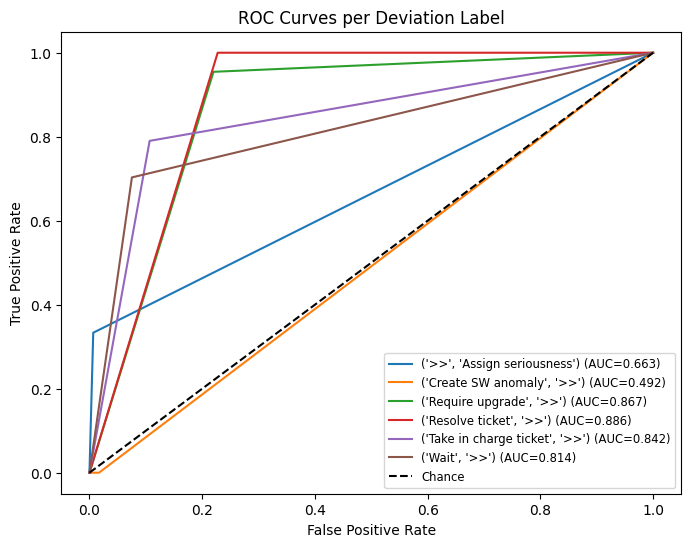

ROC_AUC macro dev per label:  {'per_label_auc': [0.663317572892041, 0.491538764266037, 0.8672410064162641, 0.8862444534086324, 0.8416715538112208, 0.8138969370860928], 'macro_auc': 0.7606517146467148}


In [30]:
roc_auc = eval.plot_macro_roc_auc()
print("ROC_AUC macro dev per label: ",roc_auc)

# Evaluation sequences

In [31]:
# Evaluation of the 

tgt_suff_dev_pos, pred_suff_dev_pos, real_tgt_suffixes, real_pred_suffix_samples = eval.get_suffix_devs()

case_level, per_label_mean, weighted_macro = eval.likelihood_at_target_positions(tgt_suff_dev_poss=tgt_suff_dev_pos, pred_suff_dev_poss=pred_suff_dev_pos)

print("likelihood at correct position in suffix for all deviations: ", per_label_mean)
print("mean likelihood of deviations' correct poistion across all deviations: ", weighted_macro)

print("min:", min(list(per_label_mean.values())))
print("max:", max(list(per_label_mean.values())))

likelihood at correct position in suffix for all deviations:  {'Assign seriousness': 0.31833333333333336, 'Create SW anomaly': 0.0, 'Require upgrade': 0.1734782608695652, 'Resolve ticket': 0.27402877697841727, 'Take in charge ticket': 0.6532530120481927, 'Wait': 0.2511111111111111}
mean likelihood of deviations' correct poistion across all deviations:  0.32978971962616827
min: 0.0
max: 0.6532530120481927


In [32]:
eval.plot_suffix_deviation_distribution(suffix_index=0,
                                        label='Take in charge ticket',
                                        tgt_suff_dev_poss=tgt_suff_dev_pos,
                                        pred_suff_dev_poss=pred_suff_dev_pos,
                                        pred_suffix_samples=real_pred_suffix_samples)

ValueError: No predicted occurrences found for label 'Take in charge ticket' in suffix 0